### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.STATUS.value_counts()
application_df.INCOME_AMT.value_counts()
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#Drop STATUS, SPECIAL_CONSIDERATIONS columns

application_df.drop(['EIN', 'NAME','STATUS'], axis = 1, inplace=True)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
aff_counts = application_df.AFFILIATION.value_counts()
aff_counts.head(40)

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_aff = list(aff_counts[aff_counts < 50].index)

# Replace in dataframe
for aff in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
Other                  50
Name: AFFILIATION, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

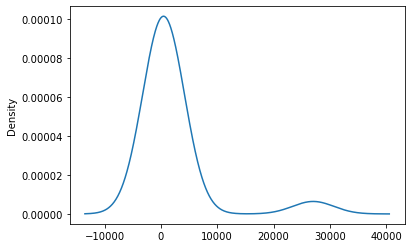

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C2150        1
C6100        1
C1580        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

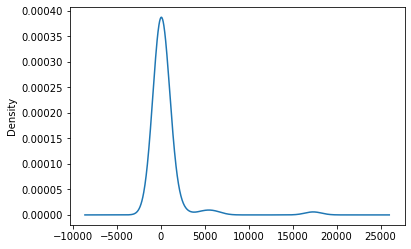

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
#Decrease conts from 1883 to 2000
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20
nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3120      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [23]:
# Train the model
#Change epochs from 100 to 40
fit_model = nn.fit(X_train,y_train,epochs=40,callbacks=[cp_callback])

Epoch 1/40
   32/25724 [..............................] - ETA: 1:10 - loss: 401.9163 - acc: 0.4375
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 3s - loss: 101632.1589 - acc: 0.5195
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2272/25724 [=>............................] - ETA: 2s - loss: 50082.7798 - acc: 0.4872 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3552/25724 [===>..........................] - ETA: 1s - loss: 37338.6681 - acc: 0.4899
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4896/25724 [====>.........................] - ETA: 1s - loss: 28614.3523 - acc: 0.5049
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 23037.6889 - acc: 0.4941
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7456/25724 [=======>......................] - ETA: 1s - lo

11616/25724 [============>.................] - ETA: 0s - loss: 69760.6443 - acc: 0.4977
Epoch 00003: saving model to checkpoints/weights.03.hdf5
13024/25724 [==============>...............] - ETA: 0s - loss: 62504.5404 - acc: 0.4949
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 57873.7284 - acc: 0.4970
Epoch 00003: saving model to checkpoints/weights.03.hdf5
15424/25724 [================>.............] - ETA: 0s - loss: 53168.4543 - acc: 0.4972
Epoch 00003: saving model to checkpoints/weights.03.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 49199.3359 - acc: 0.4964
Epoch 00003: saving model to checkpoints/weights.03.hdf5
18080/25724 [====================>.........] - ETA: 0s - loss: 47606.1709 - acc: 0.4960
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19200/25724 [=

24384/25724 [===========================>..] - ETA: 0s - loss: 19246.2898 - acc: 0.4974
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 41us/sample - loss: 18267.3223 - acc: 0.4965
Epoch 6/40
   32/25724 [..............................] - ETA: 1s - loss: 53.8801 - acc: 0.4375
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1344/25724 [>.............................] - ETA: 0s - loss: 1141.7396 - acc: 0.4628
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 945.0204 - acc: 0.4790 
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 3776/25724 [===>..........................] - ETA: 0s - loss: 688.1144 - acc: 0.4918
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5184/25724 [=====>........................] - ETA: 0s - loss: 5896.9394 - acc: 0.5019
Epoch 00006: saving model to ch

10624/25724 [===========>..................] - ETA: 0s - loss: 4854.3291 - acc: 0.4856
Epoch 00008: saving model to checkpoints/weights.08.hdf5
11872/25724 [============>.................] - ETA: 0s - loss: 4407.7269 - acc: 0.4876
Epoch 00008: saving model to checkpoints/weights.08.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 3963.4619 - acc: 0.4904
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 5106.2674 - acc: 0.4927
Epoch 00008: saving model to checkpoints/weights.08.hdf5
15840/25724 [=================>............] - ETA: 0s - loss: 5742.2636 - acc: 0.4932
Epoch 00008: saving model to checkpoints/weights.08.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 5375.1535 - acc: 0.4963
Epoch 00008: saving model to checkpoints/weights.08.hdf5
18208/25724 [====================>.........] - ETA: 0s - loss: 5414.1219 - acc

22560/25724 [=========================>....] - ETA: 0s - loss: 10206.0435 - acc: 0.4974
Epoch 00010: saving model to checkpoints/weights.10.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 9972.1654 - acc: 0.4980 
Epoch 00010: saving model to checkpoints/weights.10.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 9848.3846 - acc: 0.4989
Epoch 00010: saving model to checkpoints/weights.10.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 9842.9939 - acc: 0.4979
Epoch 11/40
   32/25724 [..............................] - ETA: 2s - loss: 839.3718 - acc: 0.4375
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 1280/25724 [>.............................] - ETA: 1s - loss: 20199.9266 - acc: 0.4570
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2592/25724 [==>...........................] - ETA: 0s - loss: 10372.0702 - acc: 0.4942
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model 

 9056/25724 [=========>....................] - ETA: 0s - loss: 1109.5741 - acc: 0.5049
Epoch 00013: saving model to checkpoints/weights.13.hdf5
10400/25724 [===========>..................] - ETA: 0s - loss: 1004.7423 - acc: 0.5058
Epoch 00013: saving model to checkpoints/weights.13.hdf5
11744/25724 [============>.................] - ETA: 0s - loss: 892.2632 - acc: 0.5080 
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 833.0330 - acc: 0.5097
Epoch 00013: saving model to checkpoints/weights.13.hdf5
14112/25724 [===============>..............] - ETA: 0s - loss: 785.6241 - acc: 0.5108
Epoch 00013: saving model to checkpoints/weights.13.hdf5
15328/25724 [================>.............] - ETA: 0s - loss: 805.0011 - acc: 0.5102
Epoch 00013: saving model to checkpoints/weights.13.hdf5
16608/25724 [==================>...........] - ETA: 0s - loss: 818.4847 - acc: 0.

21920/25724 [========================>.....] - ETA: 0s - loss: 4807.4964 - acc: 0.4907
Epoch 00015: saving model to checkpoints/weights.15.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 4604.1580 - acc: 0.4887
Epoch 00015: saving model to checkpoints/weights.15.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 4356.8582 - acc: 0.4902
Epoch 00015: saving model to checkpoints/weights.15.hdf5
25724/25724 [==============================] - 1s 41us/sample - loss: 5139.3651 - acc: 0.4929
Epoch 16/40
   32/25724 [..............................] - ETA: 1s - loss: 210.9238 - acc: 0.5938
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1152/25724 [>.............................] - ETA: 1s - loss: 1319.0110 - acc: 0.5191
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2560/25724 [=>............................] - ETA: 0s - loss: 3054.9626 - acc: 0.5164
Epoch 00016: saving model to c

 9056/25724 [=========>....................] - ETA: 0s - loss: 1684.1694 - acc: 0.5151
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 1508.9617 - acc: 0.5157
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11488/25724 [============>.................] - ETA: 0s - loss: 1389.1659 - acc: 0.5138
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12864/25724 [==============>...............] - ETA: 0s - loss: 1411.7180 - acc: 0.5141
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 1461.5523 - acc: 0.5113
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15584/25724 [=================>............] - ETA: 0s - loss: 1382.6385 - acc: 0.5062
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16864/25724 [=======

21728/25724 [========================>.....] - ETA: 0s - loss: 1600.6679 - acc: 0.5231
Epoch 00020: saving model to checkpoints/weights.20.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 1509.2569 - acc: 0.5221
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 1440.6956 - acc: 0.5217
Epoch 00020: saving model to checkpoints/weights.20.hdf5
25724/25724 [==============================] - 1s 41us/sample - loss: 1358.7666 - acc: 0.5217
Epoch 21/40
   32/25724 [..............................] - ETA: 0s - loss: 70.5293 - acc: 0.5000
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1344/25724 [>.............................] - ETA: 0s - loss: 10.6579 - acc: 0.5402
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss:

10464/25724 [===========>..................] - ETA: 0s - loss: 0.6768 - acc: 0.5420
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.6764 - acc: 0.5495
Epoch 00023: saving model to checkpoints/weights.23.hdf5
12864/25724 [==============>...............] - ETA: 0s - loss: 0.6761 - acc: 0.5562
Epoch 00023: saving model to checkpoints/weights.23.hdf5
14144/25724 [===============>..............] - ETA: 0s - loss: 0.6758 - acc: 0.5613
Epoch 00023: saving model to checkpoints/weights.23.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.6758 - acc: 0.5667
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.6757 - acc: 0.5713
Epoch 00023: saving model to checkpoints/weights.23.hdf5
18016/25724 [====================>....

24928/25724 [============================>.] - ETA: 0s - loss: 0.6679 - acc: 0.6644
Epoch 00025: saving model to checkpoints/weights.25.hdf5
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6686 - acc: 0.6605
Epoch 26/40
   32/25724 [..............................] - ETA: 1s - loss: 0.7008 - acc: 0.4688
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1376/25724 [>.............................] - ETA: 0s - loss: 0.6883 - acc: 0.5516
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 2816/25724 [==>...........................] - ETA: 0s - loss: 0.6904 - acc: 0.5376
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3968/25724 [===>..........................] - ETA: 0s - loss: 0.6912 - acc: 0.5323
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 5344/25724 [=====>........................] - ETA: 0s - loss: 0.6911 - acc: 0.5329
Epoch 00026: saving model to checkpoints/weights.2

12640/25724 [=============>................] - ETA: 0s - loss: 0.6916 - acc: 0.5286
Epoch 00028: saving model to checkpoints/weights.28.hdf5
13920/25724 [===============>..............] - ETA: 0s - loss: 0.6915 - acc: 0.5298
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.6912 - acc: 0.5320
Epoch 00028: saving model to checkpoints/weights.28.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.6912 - acc: 0.5322
Epoch 00028: saving model to checkpoints/weights.28.hdf5
17600/25724 [===================>..........] - ETA: 0s - loss: 0.6913 - acc: 0.5315
Epoch 00028: saving model to checkpoints/weights.28.hdf5
18752/25724 [====================>.........] - ETA: 0s - loss: 0.6913 - acc: 0.5314
Epoch 00028: saving model to checkpoints/weights.28.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.6913 - acc: 0.5314
Epoch 00028:

   32/25724 [..............................] - ETA: 1s - loss: 0.6794 - acc: 0.6250
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1088/25724 [>.............................] - ETA: 1s - loss: 0.6872 - acc: 0.5616
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 2304/25724 [=>............................] - ETA: 1s - loss: 0.6898 - acc: 0.5430
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 3488/25724 [===>..........................] - ETA: 1s - loss: 0.6894 - acc: 0.5453
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4832/25724 [====>.........................] - ETA: 0s - loss: 0.6894 - acc: 0.5445
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 6336/25724 [======>.......................] - ETA: 0s - loss: 0.6895 - acc: 0.5439
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7424/25724 [=======>.................

13120/25724 [==============>...............] - ETA: 0s - loss: 0.6909 - acc: 0.5345
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.6910 - acc: 0.5335
Epoch 00033: saving model to checkpoints/weights.33.hdf5
15808/25724 [=================>............] - ETA: 0s - loss: 0.6911 - acc: 0.5328
Epoch 00033: saving model to checkpoints/weights.33.hdf5
17344/25724 [===================>..........] - ETA: 0s - loss: 0.6910 - acc: 0.5337
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.6909 - acc: 0.5341
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.6909 - acc: 0.5341
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21152/25724 [=======================>.

   32/25724 [..............................] - ETA: 2s - loss: 0.6767 - acc: 0.6250
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1280/25724 [>.............................] - ETA: 1s - loss: 0.6909 - acc: 0.5344
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2240/25724 [=>............................] - ETA: 1s - loss: 0.6924 - acc: 0.5241
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3552/25724 [===>..........................] - ETA: 0s - loss: 0.6926 - acc: 0.5228
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4736/25724 [====>.........................] - ETA: 0s - loss: 0.6924 - acc: 0.5239
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.6928 - acc: 0.5189
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 7008/25724 [=======>......................] - ETA: 0s - loss: 0.6920 - acc: 0.5267
Epoch 00036:

11328/25724 [============>.................] - ETA: 0s - loss: 0.6912 - acc: 0.5326
Epoch 00038: saving model to checkpoints/weights.38.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.6914 - acc: 0.5313
Epoch 00038: saving model to checkpoints/weights.38.hdf5
13536/25724 [==============>...............] - ETA: 0s - loss: 0.6915 - acc: 0.5304
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.6915 - acc: 0.5304
Epoch 00038: saving model to checkpoints/weights.38.hdf5
15936/25724 [=================>............] - ETA: 0s - loss: 0.6915 - acc: 0.5300
Epoch 00038: saving model to checkpoints/weights.38.hdf5
17248/25724 [===================>..........] - ETA: 0s - loss: 0.6914 - acc: 0.5311
Epoch 00038: saving model to checkpoints/weights.38.hdf5
18336/25724 [====================>.........] - ETA: 0s - loss: 0.6914 - acc: 0.5307
Epoch 00038:

22432/25724 [=========================>....] - ETA: 0s - loss: 0.6912 - acc: 0.5321
Epoch 00040: saving model to checkpoints/weights.40.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.6912 - acc: 0.5324
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.6912 - acc: 0.5320
Epoch 00040: saving model to checkpoints/weights.40.hdf5
25724/25724 [==============================] - 1s 45us/sample - loss: 0.6912 - acc: 0.5324


In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6565 - acc: 0.6314
Loss: 0.6564911311638946, Accuracy: 0.6313702464103699


In [25]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.40.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6565 - acc: 0.6314
Loss: 0.6564911311638946, Accuracy: 0.6313702464103699


In [26]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity.h5")

# a third hidden layer with 20 neurons was added